Importing the necessary libraries for the project

In [94]:
import numpy as np
import matplotlib.pyplot as plt

print("Setup complete.")

Setup complete.


Let's create some dataset using *Monte Carlo toys*. 

We will generate $N=10^5$ events, that are pairs of $(A,B)$ where $A\in\{0,1\}$ or $B\in\{0,1\}$. 
The joint probability distribution is assumed to contain:

$$
P_{AB} = (p_{11},p_{10},p_{01},p_{00})= (0.60, 0.20, 0.15, 0.05)
$$

Thus the "*truth*" efficiencies are:

$$\hat e_{A} = 0.60+0.20= 0.80 ~~, \hat e_{B} = 0.60 + 0.15 = 0.75$$



<>:27: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
<>:27: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
C:\Users\User\AppData\Local\Temp\ipykernel_31432\1178067899.py:27: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
  plt.xlabel(f'$\Delta$ (A - B)')


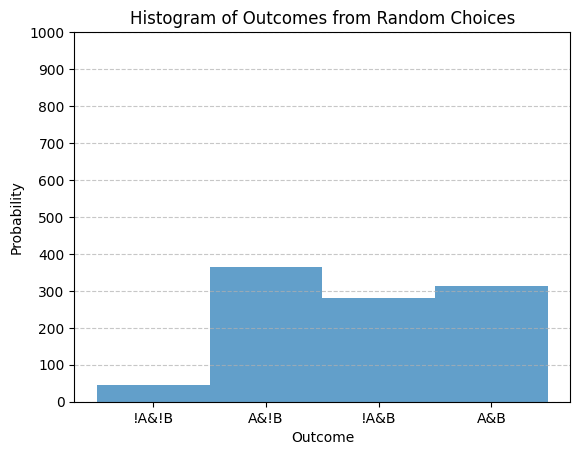

Simulation complete.
Outcomes distribution:
Eff(A) = 0.068
Eff(B) = 0.059


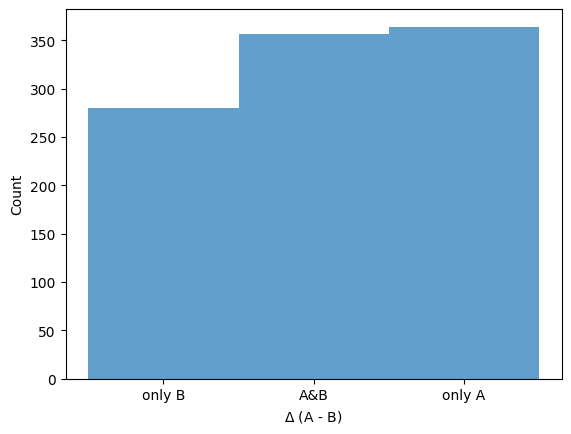

In [ ]:
Nevents = 1000

outcomes = ["A&B", "A&!B", "!A&B", "!A&!B"]
probabilities = [0.3, 0.4, 0.25, 0.05]
seed = 1234554343256563643647325287976576352321
rnd_gen = np.random.default_rng(seed)

x = rnd_gen.choice(outcomes, size=Nevents, p=probabilities)
plt.hist(x, bins=np.arange(5)-0.5, range=(0,4),  histtype='stepfilled', alpha=0.7)
plt.xlabel('Outcome')  
plt.ylabel('Probability')
plt.yticks(np.arange(0, Nevents+1, step=100))
plt.grid(True, axis='y', which='major', linestyle='--', alpha=0.7)
plt.title('Histogram of Outcomes from Random Choices') 
plt.show()

sample_A = (x == 'A&B') | (x == 'A&!B')
sample_B = (x == 'A&B') | (x == '!A&B')
sample_Delta = sample_A.astype(int) - sample_B.astype(int)

print("Simulation complete.")
print("Outcomes distribution:")
print(f"Eff(A) = {np.sum(sample_A) / Ntoys:.3f}")
print(f"Eff(B) = {np.sum(sample_B) / Ntoys:.3f}")
plt.hist(sample_Delta, bins=3, range=(-1,2), histtype='stepfilled', alpha=0.7)
plt.xticks([-0.5, 0.5, 1.5], ['only B', 'A&B', 'only A'])
plt.xlabel(f'$\Delta$ (A - B)')
plt.ylabel('Count')
plt.show()

The above set the concept. We will slightly change the code, performing the same task of sampling A,B events but after moving in a "Multinomial" formalism. This can improve the speed and efficiency of our code.

$$\{n_i\} \sim Multinomial ( N_{{events}} ; \{p_i\} ) , ~~ \{p_{i}\}\in R^4 $$

At each toy, we will assuming the efficiences $\hat e_{A},~\hat e_{B}$ to be independent Binomial variables:

$$\hat e_{A} \sim Binomial (N_{{events}}; e_{A})~~,~~\hat e_{B} \sim Binomial (N_{{events}}; e_{B})$$

To construct a "naive" Variance of the difference:

$$\sigma_{{Naive}}^2 = \dfrac{ e_{A} (1- e_{A})}{N_{{events}}}+\dfrac{ e_{B} (1-  e_{B})}{N_{{events}}} $$

And a "correct" Variance:

$$\sigma_{{Correct}}^2 = \dfrac{n_{10}+n_{01}}{N_{{events}}^2}$$

And we will compare.


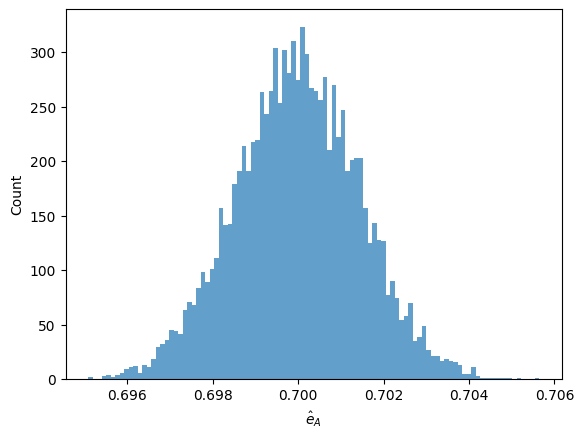

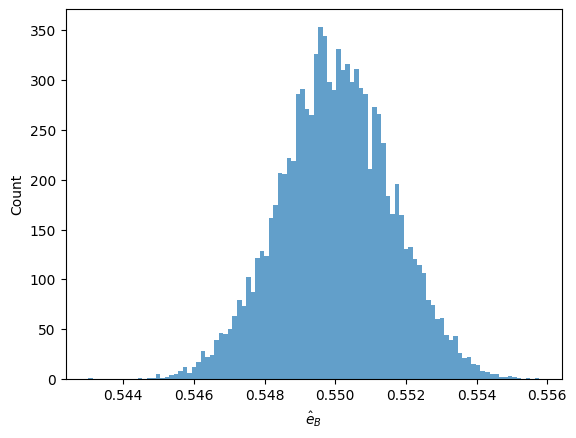

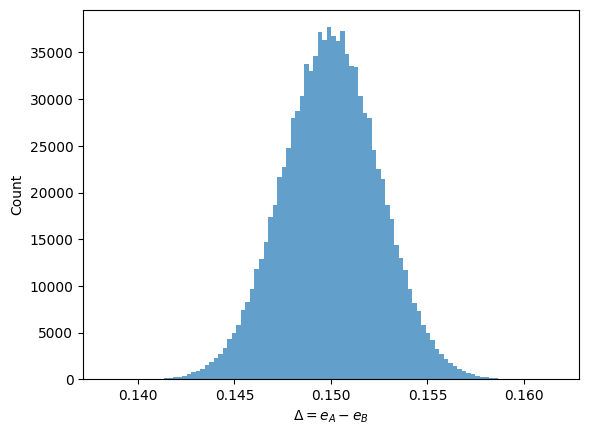

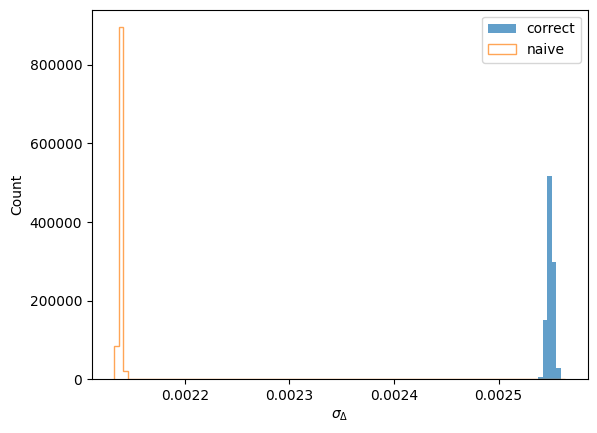

Toy simulations complete.
Mean Delta: 0.150001 ± 0.002510
Mean sigma_corr: 0.002550
Mean sigma_naive: 0.002139


In [112]:
Nevents = 100000
Ntoys = 1000000

deltas        = np.empty(Ntoys)
sigma_corrs   = np.empty(Ntoys)
sigma_naives  = np.empty(Ntoys)
eff_A_array   = np.empty(Ntoys)
eff_B_array   = np.empty(Ntoys)
for i in range(Ntoys):
    n11, n10, n01, n00 = rnd_gen.multinomial(Nevents, probabilities)
    eff_A = (n11 + n10) / Nevents  
    eff_B = (n11 + n01) / Nevents
    Delta = eff_A - eff_B
    cov_AB = (n11 / Nevents) - (eff_A * eff_B)
    sigma_corr = np.sqrt( (n10 + n01) / Nevents**2)# - (n10-n01)**2 /Nevents**3)  
    sigma_naive = np.sqrt(
        eff_A * (1 - eff_A) / Nevents +
        eff_B * (1 - eff_B) / Nevents
    )
    deltas[i]       = Delta
    sigma_corrs[i]  = sigma_corr
    sigma_naives[i] = sigma_naive
    eff_A_array[i]  = eff_A
    eff_B_array[i]  = eff_B


plt.hist(eff_A_list, bins=100, histtype='stepfilled', alpha=0.7)
#plt.xticks([-0.5, 0.5, 1.5], ['only B', 'A&B', 'only A'])
plt.xlabel(r'$\hat{{e}}_A$ ')
plt.ylabel('Count')
plt.show()

plt.hist(eff_B_list, bins=100, histtype='stepfilled', alpha=0.7)
#plt.xticks([-0.5, 0.5, 1.5], ['only B', 'A&B', 'only A'])
plt.xlabel(r'$\hat{{e}}_B$ ')
plt.ylabel('Count')
plt.show()

plt.hist(deltas, bins=100, histtype='stepfilled', alpha=0.7)
#plt.xticks([-0.5, 0.5, 1.5], ['only B', 'A&B', 'only A'])
plt.xlabel(r'$\Delta = e_A - e_B$ ')
plt.ylabel('Count')
plt.show()

min_val = min(np.min(sigma_corrs), np.min(sigma_naives))
max_val = max(np.max(sigma_corrs), np.max(sigma_naives))
# create 100 bins (101 edges) shared between both histograms
bins = np.linspace(min_val, max_val, 101)

plt.hist(sigma_corrs, bins=bins, label='correct', histtype='stepfilled', alpha=0.7)
plt.hist(sigma_naives, bins=bins, label='naive', histtype='step', alpha=0.7)
plt.xlabel(r'$\sigma_{\Delta}$')
plt.ylabel('Count')
plt.legend()
plt.show()

print("Toy simulations complete.")
print(f"Mean Delta: {np.mean(deltas):.6f} ± {np.std(deltas):.6f}")
print(f"Mean sigma_corr: {np.mean(sigma_corrs):.6f}")
print(f"Mean sigma_naive: {np.mean(sigma_naives):.6f}")



Finally produce pull plots to show better the deviation. We have for $e_{A} = p_{11} + p_{10}$ and $e_{B}=p_{11}+p_{01}$ :

$$
\Delta^{true} = e_{A} - e_{B} = p_{10} - p_{01} 
$$

and we define the pull:

$$
pull(Corr) = (\Delta_i - \Delta^{true}) /  \sigma_{corr,i}
$$


$$
pull(Naive) = (\Delta_i - \Delta^{true}) /  \sigma_{naive,i}
$$




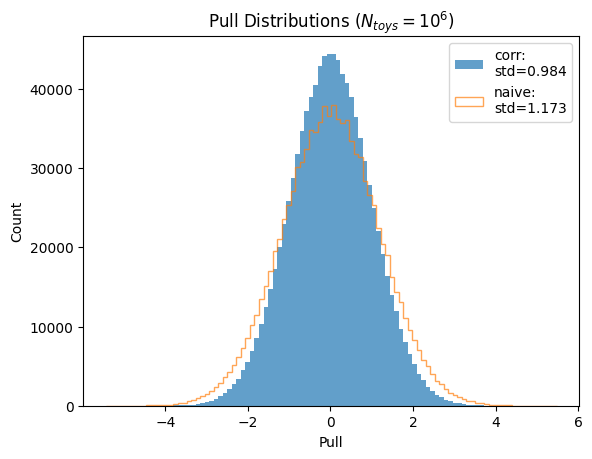

Pull distributions plotted.
Pull_corr: mean=0.000196, std=0.984399
Pull_naive: mean=0.000858, std=1.173377


In [118]:
pull_corr  = (deltas - (probabilities[1] - probabilities[2])) / sigma_corrs
pull_naive = (deltas - (probabilities[1] - probabilities[2])) / sigma_naives

min_val = min(np.min(pull_corr), np.min(pull_naive))
max_val = max(np.max(pull_corr), np.max(pull_naive))
# create 100 bins (101 edges) shared between both histograms
bins = np.linspace(min_val, max_val, 101)

plt.hist(pull_corr, bins=bins, label=f'corr:\nstd={np.std(pull_corr):.3f}', histtype='stepfilled', alpha=0.7)
plt.hist(pull_naive, bins=bins, label=f'naive:\nstd={np.std(pull_naive):.3f}', histtype='step', alpha=0.7)
plt.xlabel('Pull')
plt.ylabel('Count')
plt.title(rf'Pull Distributions ($N_{{toys}}=10^{np.log10(Ntoys):.0f}$)')
plt.legend()
plt.show()

print("Pull distributions plotted.")
print(f"Pull_corr: mean={np.mean(pull_corr):.6f}, std={np.std(pull_corr):.6f}")
print(f"Pull_naive: mean={np.mean(pull_naive):.6f}, std={np.std(pull_naive):.6f}") 

In [ ]:

Nevents = 100000

# baseline disagreement split ratio
p10_base, p01_base = 0.4, 0.25
r = p10_base / (p10_base + p01_base)

# grid
p11_vals = np.linspace(0.0, 0.95, 220)   # will be masked where invalid
s_vals   = np.linspace(0.0, 0.95, 220)   # s = p10 + p01

P11, S = np.meshgrid(p11_vals, s_vals)

P10 = r * S
P01 = (1 - r) * S
P00 = 1.0 - P11 - S

# valid region: all probs >= 0
valid = (P00 >= 0) & (P10 >= 0) & (P01 >= 0) & (P11 >= 0)

# efficiencies
eA = P11 + P10
eB = P11 + P01

# exact correlated variance for Delta
d = P10 - P01
var_corr = (S - d**2) / Nevents  # Var(Delta)

# numerical safety
valid &= (var_corr >= 0) & (eA >= 0) & (eA <= 1) & (eB >= 0) & (eB <= 1)

sigma_corr  = np.full_like(P11, np.nan, dtype=float)
sigma_naive = np.full_like(P11, np.nan, dtype=float)

sigma_corr[valid] = np.sqrt(var_corr[valid])
sigma_naive[valid] = np.sqrt(eA[valid] * (1 - eA[valid]) / Nevents +
                             eB[valid] * (1 - eB[valid]) / Nevents)

# distance metric: relative difference
rel = np.abs(sigma_naive - sigma_corr)# / sigma_corr  # >0 naive bigger, <0 naive smaller


# optional: contour where they match
plt.figure(figsize=(7.5, 5.8))
plt.contour(P11, S, rel, levels=[0.000003], colors='r', linewidths=1.5)
plt.imshow(rel, origin='lower', aspect='auto',
           extent=[p11_vals.min(), p11_vals.max(), s_vals.min(), s_vals.max()])
plt.colorbar(label=r'$|\sigma_{\mathrm{naive}}-\sigma_{\mathrm{corr}}|$')#/\sigma_{\mathrm{corr}}$')
plt.xlabel(r'$p_{11}$')
plt.ylabel(r'$p_{10}+p_{01}$')
plt.title(r'Red curve: where naive $\approx$ correlated')
plt.show()
